#### Costa Rica Poverty
<p>The Inter-American Development Bank is asking the Kaggle community for help with income qualification for some of the world's poorest families. Are you up for the challenge?</p>

<p>Here's the backstory: Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify.</p>

<p>In Latin America, one popular method uses an algorithm to verify income qualification. It’s called the Proxy Means Test (or PMT). With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need.</p>

<p>While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.</p>

<p>To improve on PMT, the IDB (the largest source of development financing for Latin America and the Caribbean) has turned to the Kaggle community. They believe that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.</p>

<p>Beyond Costa Rica, many countries face this same problem of inaccurately assessing social need. If Kagglers can generate an improvement, the new algorithm could be implemented in other countries around the world.</p>

<p>This is a Kernels-Only Competition, so you must submit your code through Kernels, rather than uploading .csv predictions. You can create private Kernels and even share/edit your work with teammates by adding them as collaborators.</p>

In [36]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import plotly.figure_factory as ff
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
train = pd.read_csv('D:\\project\\data_analyze\\house_property\\train.csv')
test = pd.read_csv('D:\\project\\data_analyze\\house_property\\test.csv')

print('train data set shape :',train.shape)
print('test data set shape :',test.shape)


train data set shape : (9557, 143)
test data set shape : (23856, 142)


In [4]:
print('servels rows of train data set')
train.head()

servels rows of train data set


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
print('summary of train data set')
train.describe()

summary of train data set


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [6]:
print('missing values of data set')
missmap = train.isnull().sum().to_frame()
missmap = missmap.sort_values(0,ascending=False)
missmap.head()

missing values of data set


,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5


### Different Levels of Poverty Household Groups

In [7]:
target = train['Target'].value_counts().to_frame()
levels = ['NonVulnerable','Moderate Poverty','Vulnerable','Extereme Poverty']
trace = go.Bar(y=target.Target,x=levels,marker=dict(color='orange',opacity=0.6))

layout = dict(title = 'Household Poverty Levels',margin = dict(l=200),width=800,height=400)
data = [trace]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

### What do households own

In [8]:
def compare_plot(col,title):
    
    tr1 = train[train['Target'] == 1][col].value_counts().to_dict()
    tr2 = train[train['Target'] == 2][col].value_counts().to_dict()
    tr3 = train[train['Target'] == 3][col].value_counts().to_dict()
    tr4 = train[train['Target'] == 4][col].value_counts().to_dict()
    
    x_labels = ['NonVulnerable','Moderate Poverty','Vulnerable','Extereme Poverty']
    trace1 = go.Bar(y=[tr1[0],tr2[0],tr3[0],tr4[0]],name='No Present',x=x_labels,
                    marker=dict(color='orange',opacity=0.6))
    trace2 = go.Bar(y=[tr1[1],tr2[1],tr3[1],tr4[1]],name='Present',x=x_labels,
                    marker=dict(color='purple',opacity=0.6))
    return trace1,trace2


tr1,tr2 = compare_plot('v18q','Tablet')
tr3,tr4 = compare_plot('refrig','Refrigerator')
tr5,tr6 = compare_plot('computer','Computer')
tr7,tr8 = compare_plot('television','Television')
tr9,tr10 = compare_plot('mobilephone','Mobilephone')

titles = ['Tablet','Refrigerator','Computer','Television','Mobilephone']
fig = tools.make_subplots(rows=3,cols=2,print_grid=False,subplot_titles=titles)
fig.append_trace(tr1,1,1)
fig.append_trace(tr2,1,1)
fig.append_trace(tr3,1,2)
fig.append_trace(tr4,1,2)
fig.append_trace(tr5,2,1)
fig.append_trace(tr6,2,1)
fig.append_trace(tr7,2,2)
fig.append_trace(tr8,2,2)
fig.append_trace(tr9,3,1)
fig.append_trace(tr10,3,1)

fig['layout'].update(height=1000,title='what do households own',barmode='stack',showlegend=False)
iplot(fig)

### Household Materials and Methods

In [9]:
def find_prominent(row,mats):
    
    for c in mats:
        if row[c] == 1:
            return c
    return

def combine(starter,colname,title,replacemap):
    mats = [c for c in train.columns if c.startswith(starter)]
    train[colname] = train.apply(lambda row:find_prominent(row,mats),axis=1)
    train[colname] = train[colname].apply(lambda x:replacemap[x] if x != None else x)
    
    om1 = train[train['Target'] == 1][colname].value_counts().to_frame()
    om2 = train[train['Target'] == 2][colname].value_counts().to_frame()
    om3 = train[train['Target'] == 3][colname].value_counts().to_frame()
    om4 = train[train['Target'] == 4][colname].value_counts().to_frame()
    
    trace1 = go.Bar(y=om1[colname],x=om1.index,name='Extereme',marker=dict(color='red',opacity=0.9))
    trace2 = go.Bar(y=om2[colname],x=om2.index,name='Moderate',marker=dict(color='red',opacity=0.5))
    trace3 = go.Bar(y=om3[colname],x=om3.index,name='Vulnerable',marker=dict(color='green',opacity=0.5))
    trace4 = go.Bar(y=om4[colname],x=om4.index,name='NonVulnerable',marker=dict(color='green',opacity=0.9))
    
    return [trace1,trace2,trace3,trace4]

titles = ['Outside Wall Material','Floor Material','Roof Material','Sanitary Conditions','Cooking Energy Sources',
         'Disposal Methods']
fig = tools.make_subplots(rows=3,cols=2,print_grid=False,subplot_titles=titles)

### outside material
flr = {'paredblolad':'Block / Brick','paredpreb':'Cement','paredmad':'Wood','paredzocalo':'Socket',
       'pareddes':'Waste Material','paredfibras':'Fibres','paredother':'Other','paredzinc':'Zink'}
res = combine('pared','outside_material','Predominanat Material of the External Walls',flr)

for r in res:
    fig.append_trace(r,1,1)
    
### floor material 
flr = {'pisomoscer':'Mosaic / Ceramic','pisocemento':'Cement','pisoother':'Other','pisomadera':'Wood',
       'pisonotiene':'No Floor','pisonatur':'Natural Material'}
res = combine('piso','floor_material','Floor Material of the Households',flr)
for r in res:
    fig.append_trace(r,1,2)

### roof material
flr = {'techozinc':'Zinc','techoentrepiso':'Fiber / Cement','techocane':'Natural Fibers','techootro':'Other'}
res = combine('techo','roof material','Roof Material of the Households',flr)
for r in res:
    fig.append_trace(r,2,1)
    
### Sanitary Conditions
flr = {'sanitario1':'No Toilet','sanitario2':'Sewer / Cesspool','sanitario3':'Septic Tank',
       'sanitario5':'Black Hole','sanitario6':'Other'}
res = combine('sanitario','Sanitary Conditions','Sanitary Conditions of the Households',flr)
for r in res:
    fig.append_trace(r,2,2)
    
### Cooking Energy Sources
flr = {'energcocinar1':'No Kitchen','energcocinar2':'Electricity','energcocinar3':'Cooking Gas',
       'energcocinar4':'Wood Charcoal'}
res = combine('energcocinar','Cooking Energy Sources','Cooking Energy Sources of the Households',flr)
for r in res:
    fig.append_trace(r,3,1)
    
### Disposal Methods
flr = {'elimbasu1':'Tanker Truck','elimbasu2':'Buried','elimbasu3':'Burning',
       'elimbasu4':'Unoccupied Space','elimbasu5':'River','elimbasu6':'Other'}
res = combine('elimbasu','Disposal Methods','Disposal Methods of the Households',flr)
for r in res:
    fig.append_trace(r,3,2)
    
fig['layout'].update(height=900,title='Key Characteristics of Households',barmode='stack',
                     showlegend=False)
iplot(fig)

### Quality of Walls, Roof, and Floor

In [14]:
def find_prominent2(row,mats):
    for i,c in enumerate(mats):
        if row[c] == 1 and c.endswith('1'):
            return 'Bad'
        elif row[c] == 1 and c.endswith('2'):
            return 'Regular'
        elif row[c] == 1 and c.endswith('3'):
            return 'Good'

badwl = [c for c in train.columns if c.startswith('epared')]
badrf = [c for c in train.columns if c.startswith('etecho')]
badfl = [c for c in train.columns if c.startswith('eviv')]

train['WallQuality'] = train.apply(lambda row:find_prominent2(row,badwl),axis=1)
train['RoofQuality'] = train.apply(lambda row:find_prominent2(row,badrf),axis=1)
train['FloorQuality'] = train.apply(lambda row:find_prominent2(row,badfl),axis=1)

wd1 = train[train['Target'] == 1]['WallQuality'].value_counts()
wd2 = train[train['Target'] == 2]['WallQuality'].value_counts()
wd3 = train[train['Target'] == 3]['WallQuality'].value_counts()
wd4 = train[train['Target'] == 4]['WallQuality'].value_counts()

trace1 = go.Bar(x=wd1.index,y=wd1.values,marker=dict(color='red',opacity=0.99),name='Extereme')
trace2 = go.Bar(x=wd2.index,y=wd2.values,marker=dict(color='red',opacity=0.69),name='Moderate')
trace3 = go.Bar(x=wd3.index,y=wd3.values,marker=dict(color='red',opacity=0.49),name='Vulnerable')
trace4 = go.Bar(x=wd4.index,y=wd4.values,marker=dict(color='red',opacity=0.29),name='NonVulnerable')

wd1 = train[train['Target'] == 1]['RoofQuality'].value_counts()
wd2 = train[train['Target'] == 2]['RoofQuality'].value_counts()
wd3 = train[train['Target'] == 3]['RoofQuality'].value_counts()
wd4 = train[train['Target'] == 4]['RoofQuality'].value_counts()

trace5 = go.Bar(x=wd1.index,y=wd1.values,marker=dict(color='green',opacity=0.99),name='Extereme')
trace6 = go.Bar(x=wd2.index,y=wd2.values,marker=dict(color='green',opacity=0.69),name='Moderate')
trace7 = go.Bar(x=wd3.index,y=wd3.values,marker=dict(color='green',opacity=0.49),name='Vulnerable')
trace8 = go.Bar(x=wd4.index,y=wd4.values,marker=dict(color='green',opacity=0.29),name='NonVulnerable')

wd1 = train[train['Target'] == 1]['FloorQuality'].value_counts()
wd2 = train[train['Target'] == 2]['FloorQuality'].value_counts()
wd3 = train[train['Target'] == 3]['FloorQuality'].value_counts()
wd4 = train[train['Target'] == 4]['FloorQuality'].value_counts()

trace9 = go.Bar(x=wd1.index,y=wd1.values,marker=dict(color='purple',opacity=0.99),name='Extereme')
trace10 = go.Bar(x=wd2.index,y=wd2.values,marker=dict(color='purple',opacity=0.69),name='Moderate')
trace11 = go.Bar(x=wd3.index,y=wd3.values,marker=dict(color='purple',opacity=0.49),name='Vulnerable')
trace12 = go.Bar(x=wd4.index,y=wd4.values,marker=dict(color='purple',opacity=0.29),name='NonVulnerable')

fig = tools.make_subplots(rows=1,cols=4,print_grid=False,
                          subplot_titles=['Extereme Poverty','Moderate Poverty','Vulnerable','NonVulnerable'])
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)
fig['layout'].update(height=250,showlegend=False,title='Wall Quality of Households')
iplot(fig)

fig = tools.make_subplots(rows=1,cols=4,print_grid=False,
                          subplot_titles=['Extereme Poverty','Moderate Poverty','Vulnerable','NonVulnerable'])
fig.append_trace(trace5,1,1)
fig.append_trace(trace6,1,2)
fig.append_trace(trace7,1,3)
fig.append_trace(trace8,1,4)
fig['layout'].update(height=250,showlegend=False,title='Roof Quality of Households')
iplot(fig)

fig = tools.make_subplots(rows=1,cols=4,print_grid=False,
                          subplot_titles=['Extereme Poverty','Moderate Poverty','Vulnerable','NonVulnerable'])
fig.append_trace(trace9,1,1)
fig.append_trace(trace10,1,2)
fig.append_trace(trace11,1,3)
fig.append_trace(trace12,1,4)
fig['layout'].update(height=250,showlegend=False,title='Floor Quality of Households')
iplot(fig)

### Education Details, Status, and Members

In [18]:
def combine2(starter,colname,title,replacemap,plotme=True):
    
    mats = [c for c in train.columns if c.startswith(starter)]
    train[colname] = train.apply(lambda row:find_prominent(row,mats),axis=1)
    train[colname] = train[colname].apply(lambda x:replacemap[x] if x != None else x)
    
    om1 = train[train['Target'] == 1][colname].value_counts().to_frame()
    om2 = train[train['Target'] == 2][colname].value_counts().to_frame()
    om3 = train[train['Target'] == 3][colname].value_counts().to_frame()
    om4 = train[train['Target'] == 4][colname].value_counts().to_frame()
    
    trace1 = go.Bar(y=om1[colname],x=om1.index,name='Extereme',marker=dict(color='red',opacity=0.9))
    trace2 = go.Bar(y=om2[colname],x=om2.index,name='Moderate',marker=dict(color='red',opacity=0.5))
    trace3 = go.Bar(y=om3[colname],x=om3.index,name='Vulnerable',marker=dict(color='orange',opacity=0.9))
    trace4 = go.Bar(y=om4[colname],x=om4.index,name='NonVulnerable',marker=dict(color='orange',opacity=0.5))
    
    data = [trace1,trace2,trace3,trace4]
    layout = dict(title=title,legend=dict(y=1.1,orientation='h'),barmode='stack',margin=dict(l=50),height=400)
    fig = go.Figure(data=data,layout=layout)
    if plotme:
        iplot(fig)

# education background of Family Members
flr = {'instlevel1':'No Education','instlevel2':'Incomplete Primary','instlevel3':'Complete Primary',
       'instlevel4':'Incomplete Sc','instlevel5':'Complete Sc','instlevel6':'Incomplete Tech Sc',
       'instlevel7':'Complete Tech Sc','instlevel8':'Undergraduation','instlevel9':'Postgraduation'}

combine2('instlevel','education_background','Education Details of Family Members',flr)

# status of Family Members
flr = {'estadocivil1':'< 10 years','estadocivil2':'Free / Coupled union','estadocivil3':'Married',
       'estadocivil4':'Divorced','estadocivil5':'Sseparated','estadocivil6':'Widow','estadocivil7':'Single'}
combine2('estadocivil','status_members','Status of Family Members',flr)

# number of Family Members
flr = {'parentesco1':'Household Head','parentesco2':'Spouse/Partner','parentesco3':'Son/Doughter',
       'parentesco4':'Stepson/Doughter','parentesco5':'Son/Doughter in Law','parentesco6':'Grandson/Doughter',
       'parentesco7':'Mother/Father','parentesco8':'Father/Mother in Law','parentesco9':'Brother/Sister',
       'parentesco10':'Brother/Sister in Law',
       'parentesco11':'Other Family Member','parentesco12':'Other Non Family Member'}
combine2('parentesco','family_members','Family Member in the Households',flr)

# region of the house
flr = {'lugar1':'Central','lugar2':'Chorotega','lugar3':'PacÃƒÂ­fico central','lugar4':'Brunca',
       'lugar5':'Huetar AtlÃƒÂ¡ntica','lugar6':'Huetar Norte'}
combine2('lugar','region','Region of the Households',flr,plotme=False)


 ### Gender and Age Distributions

In [23]:
def agbr(col):
    
    temp1 = train[train['Target']==1][col].value_counts()
    trace1 = go.Bar(y=temp1.values,x=temp1.index,marker=dict(color='red',opacity=0.89),name='Extereme')
    
    temp2 = train[train['Target']==2][col].value_counts()
    trace2 = go.Bar(y=temp2.values,x=temp2.index,marker=dict(color='orange',opacity=0.79),name='Moderate')
    
    temp3 = train[train['Target']==3][col].value_counts()
    trace3 = go.Bar(y=temp3.values,x=temp3.index,marker=dict(color='purple',opacity=0.89),name='Vulnerable')
    
    temp4 = train[train['Target']==4][col].value_counts()
    trace4 = go.Bar(y=temp4.values,x=temp4.index,marker=dict(color='green',opacity=0.79),name='NonVulnerable')
    
    return [trace1,trace2,trace3,trace4]

    layout = dict(height=400)
    fig = go.Figure(data=[trace1,trace2,trace3,trace4],layout=layout)
    iplot(fig)
    

titles = ['Total Person','< 12 Yrs','>= 12 Yrs','Total Male','Males < 12 Yrs','Males >= 12 Yrs',
          'Total Female','Females < 12 Yrs','Females >= 12 Yrs']
fig = tools.make_subplots(rows=3,cols=3,print_grid=False,subplot_titles=titles)

# persons younger than 12 years of age
res = agbr('r4t1')
for x in res:
    fig.append_trace(x,1,1)

# persons 12 years of age and older
res = agbr('r4t2')
for x in res:
    fig.append_trace(x,1,2)

# Total persons in the household
res = agbr('r4t3')
for x in res:
    fig.append_trace(x,1,3)
    
#  Males younger than 12 years of age
res = agbr('r4h1')
for x in res:
    fig.append_trace(x,2,1)


#  Males 12 years of age and older  
res = agbr('r4h2')
for x in res:
    fig.append_trace(x,2,2)

# Total males in the household
res = agbr('r4h3')
for x in res:
    fig.append_trace(x,2,3)

# Females younger than 12 years of age
res = agbr('r4m1')
for x in res:
    fig.append_trace(x,3,1)
    
# Females 12 years of age and older
res = agbr('r4m2')
for x in res:
    fig.append_trace(x,3,2)

# Total females in the household
res = agbr('r4m3')
for x in res:
    fig.append_trace(x,3,3)

fig.layout.update(height=750,showlegend=False,title='Gender and Age Distributions')
iplot(fig)

### Age Groups among the households

In [24]:
titles = ['Children','Adults','65+ Old']
fig = tools.make_subplots(rows=1,cols=3,print_grid=False,subplot_titles=titles)

# Number of children 0 to 19 in household
res = agbr('hogar_nin')
for x in res:
    fig.append_trace(x,1,1)

# Number of adults in household
res = agbr('hogar_adul')
for x in res:
    fig.append_trace(x,1,2)
    
# Number of individuals 65+ in the household
res = agbr('hogar_mayor')
for x in res:
    fig.append_trace(x,1,3)

fig.layout.update(height = 350,title = 'People Distribution in Households',barmode='stack',showlegend=False)
iplot(fig)

### Household Size

In [25]:
# size of the household
tm = agbr('tamhog')
layout = dict(title='Household People Size',margin=dict(l=100),height=400,legend=dict(orientation='h',y=1))
fig = go.Figure(data=tm,layout=layout)
iplot(fig)

### Monthly Rent Comparisons

In [26]:
def compare_dicts(col,title):
    
    trace1 = go.Histogram(name='Extereme',x=train[train['Target']==1][col])
    trace2 = go.Histogram(name='Moderate',x=train[train['Target']==2][col])
    trace3 = go.Histogram(name='Vulnerable',x=train[train['Target']==3][col])
    trace4 = go.Histogram(name='NonVulnerable',x=train[train['Target']==4][col])
    
    fig = tools.make_subplots(rows=2,cols=2,print_grid=False)
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,2)
    
    fig.layout.update(height=400,showlegend=False,title=title)
    iplot(fig)

#  Monthly rent payment
compare_dicts('v2a1','Monthy Rent for groups of houses')

### Poverty Levels with respect to Monthly Rent and Age of the House

In [29]:
trace0 = go.Scatter(x=train['v2a1'],y=train['age'],name='Extereme',mode='markers',
                    marker=dict(color=train.Target,opacity=1,size=16-train.Target**2))
layout = go.Layout(xaxis=dict(title='Monthy Rent of the house',range=(0,400000)),
                   yaxis=dict(title='Age of the house'))
fig = go.Figure(data=[trace0],layout=layout)
iplot(fig)

### Poverty Levels with respect to Number of Rooms and People Living

In [33]:
train1 = train[train['Target']==1]
train2 = train[train['Target']==2]
train3 = train[train['Target']==3]
train4 = train[train['Target']==4]

# number of persons living in the household
trace1 = go.Scatter(x=train1['rooms'],y = train1['tamviv'],name='Extereme',mode='markers',
                    marker=dict(color='red',opacity=0.4,size=10))
trace2 = go.Scatter(x=train2['rooms'],y = train2['tamviv'],name='Moderate',mode='markers',
                    marker=dict(color='orange',opacity=0.4,size=10))
trace3 = go.Scatter(x=train3['rooms'],y = train3['tamviv'],name='Vulnerable',mode='markers',
                    marker=dict(color='blue',opacity=0.4,size=10))
trace4 = go.Scatter(x=train4['rooms'],y = train4['tamviv'],name='NonVulnerable',mode='markers',
                    marker=dict(color='green',opacity=0.4,size=10))

fig = tools.make_subplots(rows=2,cols=2,print_grid=False,
                          subplot_titles = ['Extereme Poverty','Moderate Poverty','Vulnerable',' Non Vulnerable'])

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,2,1)
fig.append_trace(trace4,2,2)

fig.layout.update(height=600,showlegend=False,title='Rooms (Yaxis) and Persons Living (Xaxis)')
iplot(fig)

### Distributions (Poverty Levels wise) of some continuous variables

In [35]:
def box_distribution(col,title):
    y1 = train1[col]
    y2 = train2[col]
    y3 = train3[col]
    y4 = train4[col]
    
    trace1 = go.Box(y=y1,name='Extereme',marker=dict(color='red',opacity=0.7))
    trace2 = go.Box(y=y2,name='Moderate',marker=dict(color='orange',opacity=0.7))
    trace3 = go.Box(y=y3,name='Vulnerable',marker=dict(color='blue',opacity=0.7))
    trace4 = go.Box(y=y4,name='NonVulnerable',marker=dict(color='green',opacity=0.7))
    
    return [trace1,trace2,trace3,trace4]

    layout = dict(title=title,showlegend=False,height=400)
    data = [trace1,trace2,trace3,trace4]
    fig = go.Figure(data=data,layout=layout)
    iplot(fig)
    
titles = ['Number of Rooms','Number of Bedrooms','Mobile Phone Owned','Tablets Owned','Age of the House',
         'Overcrowding Per Persons']
fig = tools.make_subplots(rows=3,cols=2,print_grid=False,subplot_titles=titles)

res = box_distribution('rooms','Number of')
for x in res:
    fig.append_trace(x,1,1)

res = box_distribution('bedrooms','Number of')
for x in res:
    fig.append_trace(x,1,2)
    
res = box_distribution('qmobilephone','Number of')
for x in res:
    fig.append_trace(x,2,1)

# number of tablets household owns
res = box_distribution('v18q1','Number of')
for x in res:
    fig.append_trace(x,2,2)
    
res = box_distribution('age','Number of')
for x in res:
    fig.append_trace(x,3,1)

# number of persons per room
res = box_distribution('overcrowding','Number of')
for x in res:
    fig.append_trace(x,3,2)

fig.layout.update(height=900,title='',barmode='stack',showlegend=False)
iplot(fig)

### Effect of Number of Rooms and Outside Material on Poverty Levels

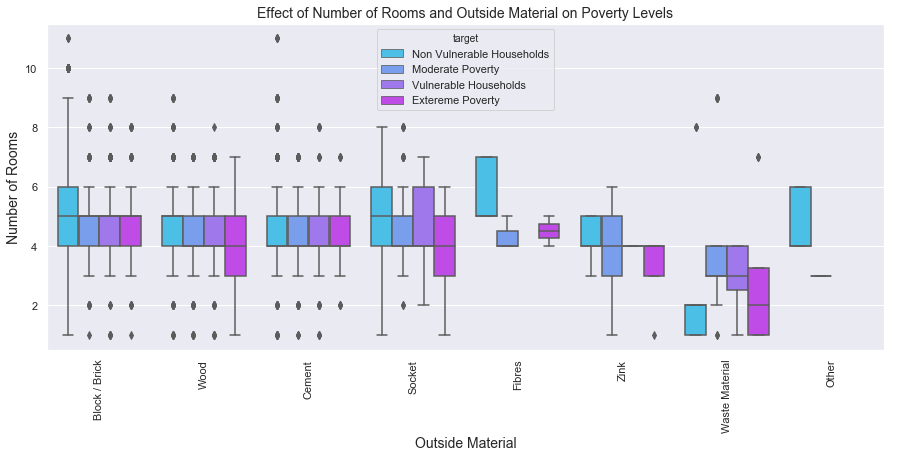

In [38]:
trgt = {1:'Extereme Poverty',2:'Moderate Poverty',3:'Vulnerable Households',4:'Non Vulnerable Households'}
train['target'] = train['Target'].apply(lambda x:trgt[x])
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='outside_material',y='rooms',hue='target',palette='cool',data=train)
plt.title('Effect of Number of Rooms and Outside Material on Poverty Levels',fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Outside Material',fontsize=14)
plt.ylabel('Number of Rooms',fontsize=14)
plt.show()

### Effect of Number of Rooms and Floor Material on Poverty Levels

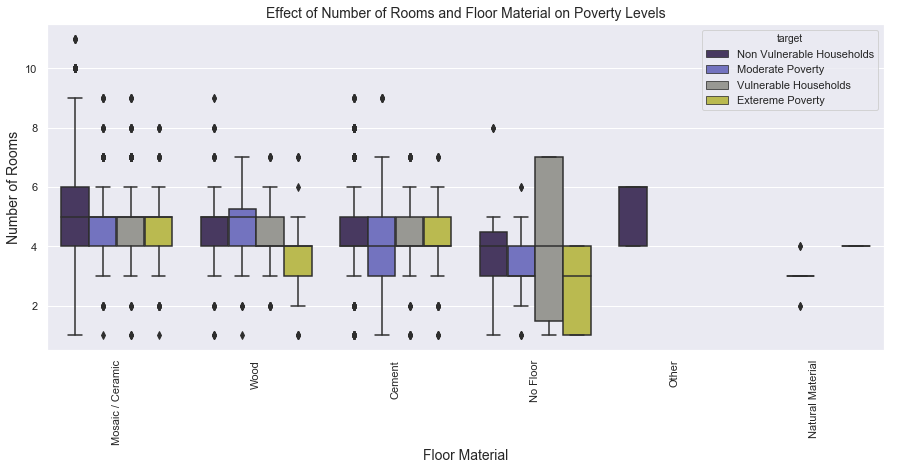

In [39]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='floor_material',y='rooms',hue='target',palette='gist_stern',data=train)
plt.title('Effect of Number of Rooms and Floor Material on Poverty Levels',fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Floor Material',fontsize=14)
plt.ylabel('Number of Rooms',fontsize=14)
plt.show()

### Effect of Education Details and Household Size on Poverty Levels

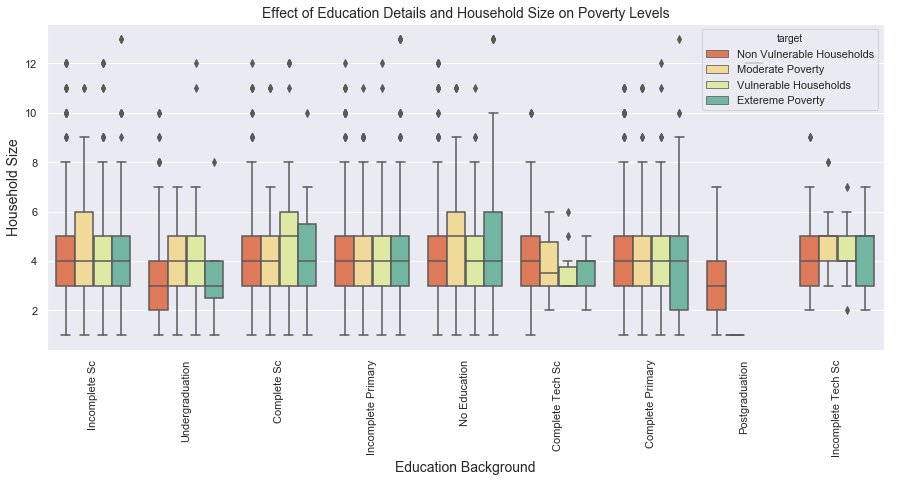

In [40]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='education_background',y='hhsize',hue='target',palette='Spectral',data=train)
plt.title('Effect of Education Details and Household Size on Poverty Levels',fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Education Background',fontsize=14)
plt.ylabel('Household Size',fontsize=14)
plt.show()

### Effect of Family Members Status and Household Size on Poverty Levels

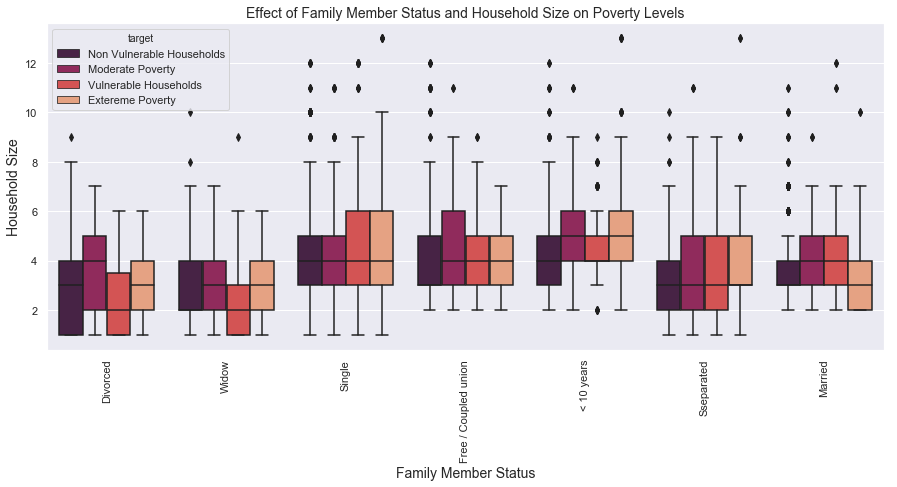

In [41]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='status_members',y='hhsize',hue='target',palette='rocket',data=train)
plt.title('Effect of Family Member Status and Household Size on Poverty Levels',fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Family Member Status',fontsize=14)
plt.ylabel('Household Size',fontsize=14)
plt.show()

### Effect of Family Memebrs Type and Household Size on Poverty Levels

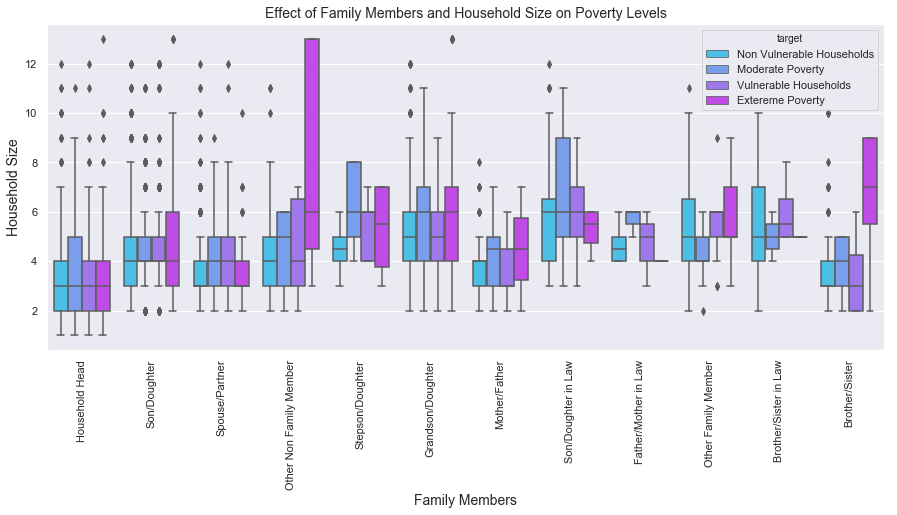

In [42]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='family_members',y='hhsize',hue='target',palette='cool',data=train)
plt.title('Effect of Family Members and Household Size on Poverty Levels',fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Family Members',fontsize=14)
plt.ylabel('Household Size',fontsize=14)
plt.show()

### Area / Location Details

In [44]:
train['area_type'] = train['area1'].apply(lambda x:'urbal' if x==1 else 'rural')
cols = ['area_type','target']
colmap = sns.light_palette('yellow',as_cmap=True)
pd.crosstab(train[cols[1]],train[cols[0]]).style.background_gradient(cmap=colmap)

area_type,rural,urbal
target,,
Extereme Poverty,255,500
Moderate Poverty,545,1052
Non Vulnerable Households,1500,4496
Vulnerable Households,428,781


### Region with respect to Poverty Levels

In [48]:
cols = ['region','target']
colmap = sns.light_palette('orange',as_cmap=True)
pd.crosstab(train[cols[0]],train[cols[1]]).style.background_gradient(cmap=colmap)

target,Extereme Poverty,Moderate Poverty,Non Vulnerable Households,Vulnerable Households
region,,,,
Brunca,98,175,406,112
Central,325,752,3923,616
Chorotega,77,161,531,117
Huetar AtlÃƒÂ¡ntica,103,213,438,143
Huetar Norte,69,168,425,109
PacÃƒÂ­fico central,83,128,273,112
